In [1]:
from keras import layers, models, optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = '/Users/camargo/Projects/deeplearning/data/dogs-vs-cats-small'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

train_datagen = image.ImageDataGenerator(
    fill_mode='nearest',
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    width_shift_range=0.2,
    zoom_range=0.2
)
test_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


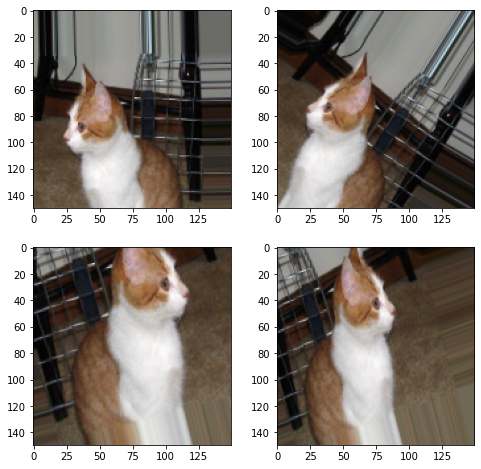

In [3]:
train_cats_dir = os.path.join(train_dir, 'cats')
file_names = [
    os.path.join(train_cats_dir, file_name) for file_name in os.listdir(train_cats_dir)
]
img_path = file_names[0] # Just take the first example.
img = image.load_img(img_path, target_size=(150, 150))
img_arr = image.img_to_array(img)
img_arr = img_arr.reshape((1,) + img_arr.shape)

i = 0
plt.figure(figsize=(8, 8))
for batch in train_datagen.flow(img_arr, batch_size=1):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [4]:
for data_batch, labels_batch in train_generator:
    print(f'data_batch: {data_batch.shape}')
    print(f'labels_batch: {labels_batch.shape}')
    break

data_batch: (20, 150, 150, 3)
labels_batch: (20,)


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
model.compile(
    loss='binary_crossentropy',
    metrics=['acc'],
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
)

In [7]:
history = model.fit(
    train_generator,
    epochs=150,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=50
)

========] - 31s 314ms/step - loss: 0.6365 - acc: 0.6385 - val_loss: 0.6194 - val_acc: 0.6430
Epoch 6/150
100/100 [==============================] - 31s 314ms/step - loss: 0.6236 - acc: 0.6480 - val_loss: 0.6040 - val_acc: 0.6720
Epoch 7/150
100/100 [==============================] - 31s 314ms/step - loss: 0.6037 - acc: 0.6690 - val_loss: 0.6143 - val_acc: 0.6450
Epoch 8/150
100/100 [==============================] - 32s 315ms/step - loss: 0.6070 - acc: 0.6690 - val_loss: 0.6045 - val_acc: 0.6490
Epoch 9/150
100/100 [==============================] - 31s 315ms/step - loss: 0.5957 - acc: 0.6660 - val_loss: 0.5831 - val_acc: 0.6780
Epoch 10/150
100/100 [==============================] - 31s 314ms/step - loss: 0.5958 - acc: 0.6825 - val_loss: 0.5533 - val_acc: 0.7110
Epoch 11/150
100/100 [==============================] - 31s 314ms/step - loss: 0.5782 - acc: 0.6975 - val_loss: 0.5603 - val_acc: 0.7040
Epoch 12/150
100/100 [==============================] - 31s 314ms/step - loss: 0.5759 - a

In [9]:
model.save('cats-vs-dogs-convnet-v2.h5')

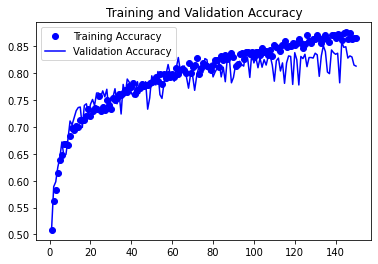

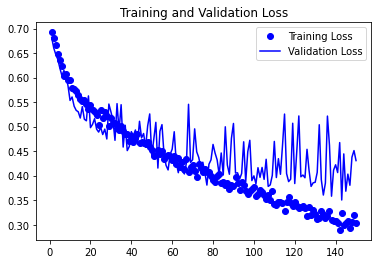

In [10]:
loss = history.history.get('loss')
acc = history.history.get('acc')
val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_acc')

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()